In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

In [6]:
training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.4,
                                    height_shift_range=0.4
                             )
training_set = training_datagen.flow_from_directory(
                                    directory='train/',
                                    batch_size=32,
                                    target_size=(64,64),
                                    class_mode='binary'
)

Found 4000 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
                                    directory='test/',
                                    batch_size=32,
                                    target_size=(64,64),
                                    class_mode='binary'
)

Found 300 images belonging to 2 classes.


In [8]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(
                                    directory='valid/',
                                    batch_size=32,
                                    target_size=(64,64),
                                    class_mode='binary'
)

Found 300 images belonging to 2 classes.


In [12]:
cnn = Sequential()

In [13]:
cnn.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3)))
cnn.add(MaxPooling2D(pool_size=2))

In [14]:
cnn.add(Conv2D(filters=64,kernel_size=(3,3)))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(0.2))

In [15]:
cnn.add(Conv2D(filters=128,kernel_size=3))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(0.2))

In [16]:
cnn.add(Conv2D(filters=256,kernel_size=3))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(0.3))

In [17]:
cnn.add(Flatten())

In [18]:
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.3))

In [19]:
cnn.add(Dense(units=1,activation='sigmoid'))

In [20]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)        

In [21]:
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
r = cnn.fit(x=training_set,validation_data=validation_set,epochs=50,batch_size=32)

Epoch 1/50
125/125 [==============================] - 28s 224ms/step - loss: 0.6695 - accuracy: 0.5900 - val_loss: 0.6361 - val_accuracy: 0.6100
Epoch 2/50
125/125 [==============================] - 27s 215ms/step - loss: 0.6434 - accuracy: 0.6240 - val_loss: 0.5831 - val_accuracy: 0.7033
Epoch 3/50
125/125 [==============================] - 25s 200ms/step - loss: 0.6139 - accuracy: 0.6637 - val_loss: 0.7313 - val_accuracy: 0.5533
Epoch 4/50
125/125 [==============================] - 26s 206ms/step - loss: 0.5965 - accuracy: 0.6835 - val_loss: 0.5242 - val_accuracy: 0.7500
Epoch 5/50
125/125 [==============================] - 26s 205ms/step - loss: 0.5234 - accuracy: 0.7467 - val_loss: 0.3569 - val_accuracy: 0.8367
Epoch 6/50
125/125 [==============================] - 24s 192ms/step - loss: 0.4519 - accuracy: 0.7950 - val_loss: 0.5592 - val_accuracy: 0.7600
Epoch 7/50
125/125 [==============================] - 24s 190ms/step - loss: 0.4098 - accuracy: 0.8227 - val_loss: 0.2758 - val_ac

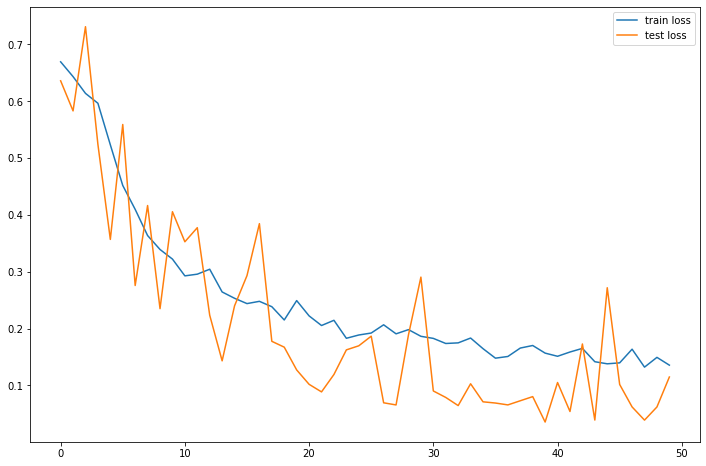

In [24]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

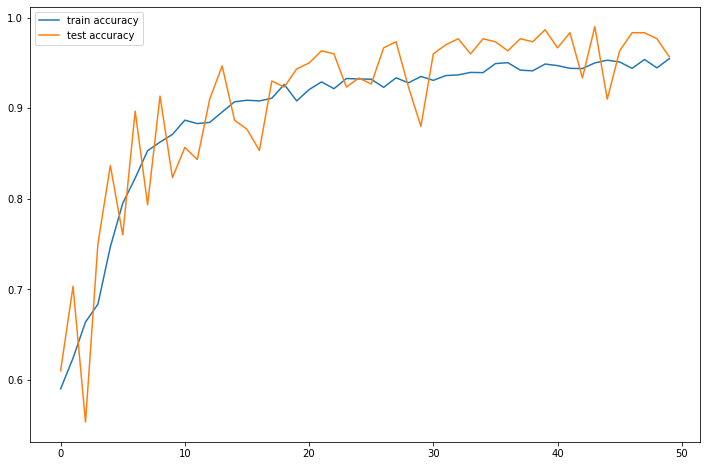

In [26]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='test accuracy')
plt.legend();